This code replicates the examples from the paper "Causal Fourier Analysis on Directed Acyclic Graphs and Posets", from Bastian Seifert, Chris Wendler, and Markus Püschel

In [1]:
import numpy as np
from numpy import linalg as la
import networkx as nx
import matplotlib.pyplot as plt

import src.dag_utils as dag_utils


## Example from Marcus paper

Adjacency matrix:
[[0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.3 0.2 0.  0.  0.  0. ]
 [0.7 0.7 0.  0.  0.  0. ]
 [0.  0.  1.  0.5 0.  0. ]
 [0.  0.1 0.  0.5 0.  0. ]]
Weighted Transitive Closure (Polution model):
[[1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.3  0.2  1.   0.   0.   0.  ]
 [0.7  0.7  0.   1.   0.   0.  ]
 [0.65 0.55 1.   0.5  1.   0.  ]
 [0.35 0.45 0.   0.5  0.   1.  ]]
Fourier Transform (for signals):
[[ 1.   0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   0.   0. ]
 [-0.3 -0.2  1.   0.   0.   0. ]
 [-0.7 -0.7  0.   1.  -0.  -0. ]
 [ 0.   0.  -1.  -0.5  1.   0. ]
 [ 0.  -0.1  0.  -0.5  0.   1. ]]


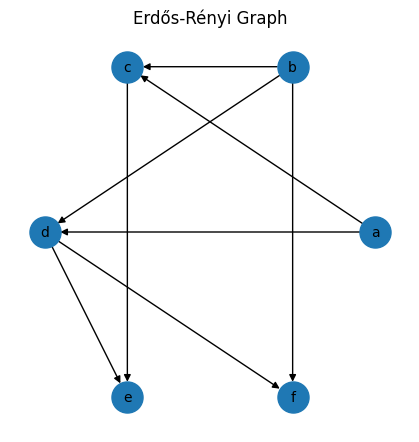

In [2]:
np.set_printoptions(precision=3)

A = np.array([[0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [.3, .2, 0, 0, 0, 0],
              [.7, .7, 0 ,0 ,0 ,0],
              [0, 0, 1, .5, 0, 0],
              [0, .1, 0, .5, 0, 0]])

dag = nx.from_numpy_array(A.T, create_using=nx.DiGraph())
n = A.shape[0]
W = la.inv(np.eye(n) - A)
F = la.inv(W)

# Plot DAG
plt.figure(figsize=(4, 4))
node_labels = {i: chr(97 + i) for i in range(n)}
nx.draw(dag, with_labels=True, labels=node_labels, arrows=True, node_size=500, font_size=10, pos=nx.circular_layout(dag))
plt.title('Erdős-Rényi Graph')

print('Adjacency matrix:')
print(A)

print('Weighted Transitive Closure (Polution model):')
print(W)

print('Fourier Transform (for signals):')
print(F)

# plt.figure(figsize=(4, 4))
# plt.imshow(A)
# plt.title('Adjacency matrix')
# plt.colorbar()
# plt.show()

In [3]:
node = 'e'
d_q = dag_utils.compute_Dq(dag, node, only_diag=True)

print('Indicator matrix Dq:')
print(d_q)

Tq = np.round((W * d_q) @ F, 3)
print(f'GSO of node {node}:')
print(Tq)

Indicator matrix Dq:
[1. 1. 1. 1. 1. 0.]
GSO of node e:
[[ 1.   0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0. ]
 [-0.   0.   0.   0.   1.   0. ]
 [ 0.   0.1  0.   0.5  0.   0. ]]


In [4]:
H = np.zeros((n,n))
coef = np.array([1, 1, 1, 0, 2, 2])

for i in range(n):
    if coef[i] == 0:
        continue

    d_q = dag_utils.compute_Dq(dag, i, only_diag=True)
    Tq = (W * d_q) @ F
    H += coef[i]*Tq

max_eigval = np.max(la.eigvals(H))
H = np.round(H, 1)
print('Low pass filter')
print(H)

Low pass filter
[[6.  0.  0.  0.  0.  0. ]
 [0.  6.  0.  0.  0.  0. ]
 [0.9 0.6 3.  0.  0.  0. ]
 [1.4 1.4 0.  4.  0.  0. ]
 [1.6 1.3 1.  1.  2.  0. ]
 [0.7 1.1 0.  1.  0.  2. ]]


## A more challenging example

Adjacency matrix:
[[0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.2 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.7 0.2 0.  0. ]
 [0.  0.  0.  0.3 0.8 0.  0. ]]
Weighted Transitive Closure (Polution model):
[[ 1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.  ]
 [ 0.3   0.    1.    0.    0.    0.    0.  ]
 [ 0.5   0.5   0.    1.    0.    0.    0.  ]
 [ 0.2   0.5   0.    0.    1.    0.    0.  ]
 [ 0.69  0.45  1.    0.7   0.2   1.   -0.  ]
 [ 0.31  0.55 -0.    0.3   0.8  -0.    1.  ]]


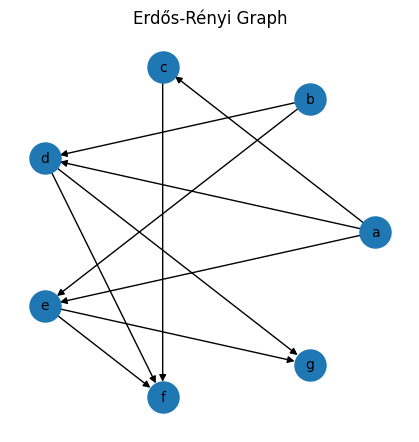

In [5]:
A = np.array([[0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [.3, 0, 0, 0, 0, 0, 0],
              [.5, .5, 0 ,0 ,0 ,0, 0],
              [.2, .5, 0, 0, 0, 0, 0],
              [0, 0, 1, .7, .2, 0, 0],
              [0, 0, 0, .3, .8, 0, 0]])

dag = nx.from_numpy_array(A.T, create_using=nx.DiGraph())
n = A.shape[0]
W = la.inv(np.eye(n) - A)
F = la.inv(W)

# Plot DAG
plt.figure(figsize=(4, 4))
node_labels = {i: chr(97 + i) for i in range(n)}
nx.draw(dag, with_labels=True, labels=node_labels, arrows=True, node_size=500, font_size=10, pos=nx.circular_layout(dag))
plt.title('Erdős-Rényi Graph')

print('Adjacency matrix:')
print(A)

print('Weighted Transitive Closure (Polution model):')
print(W)

# print('Fourier Transform (for signals):')
# print(F)

# plt.figure(figsize=(4, 4))
# plt.imshow(A)
# plt.title('Adjacency matrix')
# plt.colorbar()
# plt.show()

In [6]:
node = 'g'
Dq = dag_utils.compute_Dq(dag, node, verbose=False)
Tq = np.round(W @ Dq @ F, 3)
print(f'GSO of node {node}:')
print(Tq)

GSO of node g:
[-0.43  -0.85  -1.74  -0.316 -1.076  2.04   2.96 ]


## Example from Fig 6 with pollution transitive closure 

Adjacency matrix:
[[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.2 0.2 0.  0. ]
 [0.  0.  0.  0.  0.2 0.  0.  0. ]]
Weighted Transitive Closure (Polution model):
[[1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.2   1.    0.    0.    0.    0.    0.    0.   ]
 [0.2   0.    1.    0.    0.    0.    0.    0.   ]
 [0.08  0.2   0.2   1.    0.    0.    0.    0.   ]
 [0.08  0.2   0.2   0.    1.    0.    0.    0.   ]
 [0.08  0.2   0.2   0.    0.    1.    0.    0.   ]
 [0.048 0.12  0.12  0.2   0.2   0.2   1.    0.   ]
 [0.016 0.04  0.04  0.    0.2   0.    0.    1.   ]]
Fourier Transform (for signals):
[[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [-2.000e-01  1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [-2.000e-01  0.000e+00  1.

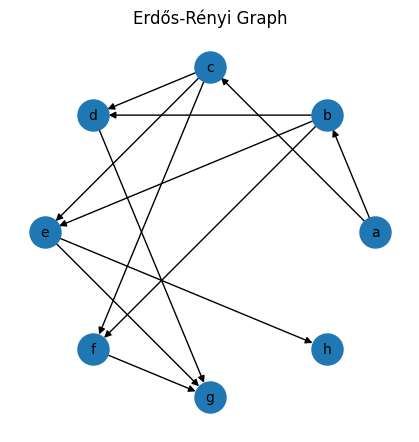

In [7]:
A = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 1 ,0 ,0 ,0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0]])

A = A*.2

dag = nx.from_numpy_array(A.T, create_using=nx.DiGraph())
n = A.shape[0]
W = la.inv(np.eye(n) - A)
F = la.inv(W)

# Plot DAG
plt.figure(figsize=(4, 4))
node_labels = {i: chr(97 + i) for i in range(n)}
nx.draw(dag, with_labels=True, labels=node_labels, arrows=True, node_size=500, font_size=10, pos=nx.circular_layout(dag))
plt.title('Erdős-Rényi Graph')

print('Adjacency matrix:')
print(A)

print('Weighted Transitive Closure (Polution model):')
print(W)

print('Fourier Transform (for signals):')
print(F)

# plt.figure(figsize=(4, 4))
# plt.imshow(A)
# plt.title('Adjacency matrix')
# plt.colorbar()
# plt.show()

In [8]:
node = 'h'
Dq = dag_utils.compute_Dq(dag, node, verbose=False)
Tq = np.round(W @ Dq @ F, 3)
print(f'GSO of node {node}:')
print(Tq)

GSO of node h:
[0.52  0.712 0.712 0.382 1.123 0.382 0.488 1.296]
